# Predict whether an adult is at risk of Diabetes

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [97]:
target_map = {0:0, 1:1, 2:1}
df['Diabetes_012'] = df['Diabetes_012'].map(target_map)
y = df['Diabetes_012']
y.unique()

array([0, 1])

In [98]:
y.value_counts(normalize=True)*100

Diabetes_012
0    84.24117
1    15.75883
Name: proportion, dtype: float64

In [7]:
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(202944, 21) (50736, 21) (202944,) (50736,)


In [11]:
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

## Model Training

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('ord', StandardScaler(), ordinal_features),
    ('bin', StandardScaler(), binary_features)
]
)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('ord', StandardScaler(),
                                                  ['GenHlth', 'Education',
                                                   'Income', 'Age']),
                                                 ('bin', StandardScaler(),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'DiffWalk',
                                                   'Sex'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42741
           1       0.34      0.76      0.47      7995

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736



Text(50.72222222222221, 0.5, 'True')

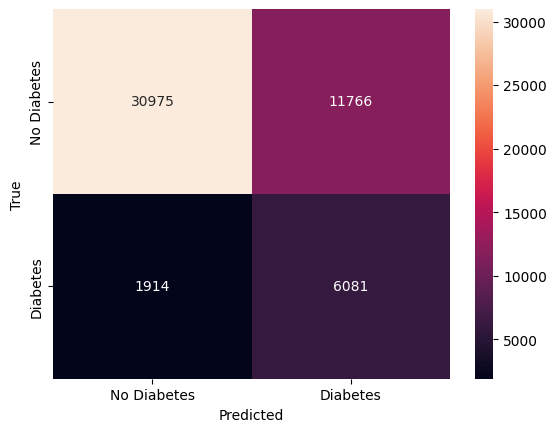

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_reg = reg_pipeline.predict(X_test)


print(classification_report(y_test, y_pred_reg))
cm = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', 'passthrough'),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     42741
           1       0.31      0.32      0.31      7995

    accuracy                           0.78     50736
   macro avg       0.59      0.59      0.59     50736
weighted avg       0.78      0.78      0.78     50736



Text(50.72222222222221, 0.5, 'True')

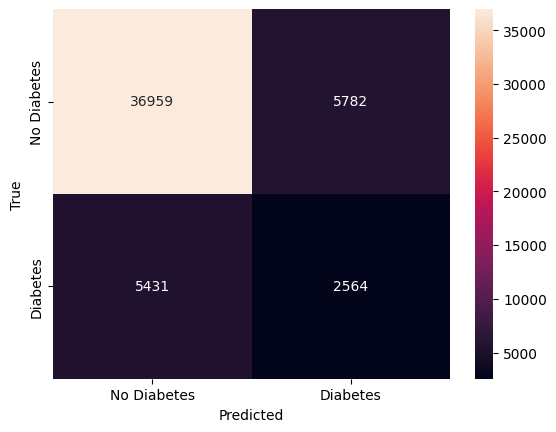

In [37]:
y_pred_dt = dt_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', 'passthrough'),
                ('classifier', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     42741
           1       0.51      0.21      0.30      7995

    accuracy                           0.84     50736
   macro avg       0.69      0.59      0.61     50736
weighted avg       0.81      0.84      0.82     50736



Text(50.72222222222221, 0.5, 'True')

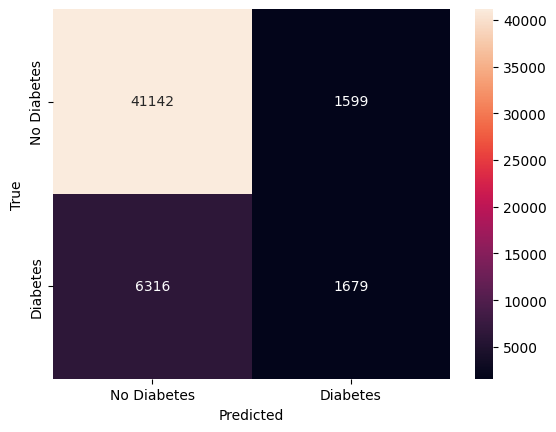

In [27]:
y_pred_rf = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Tune RF

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = Pipeline(steps=[
    ('preprocessor','passthrough'),
    ('classifier', RandomForestClassifier(n_estimators=50,
                                         criterion='gini',
                                         random_state=42))
])

rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', 'passthrough'),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [58]:
rf_tuned.score(X_test, y_test)

0.8439175339009776

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     42741
           1       0.51      0.21      0.30      7995

    accuracy                           0.84     50736
   macro avg       0.69      0.59      0.61     50736
weighted avg       0.81      0.84      0.82     50736



Text(50.72222222222221, 0.5, 'True')

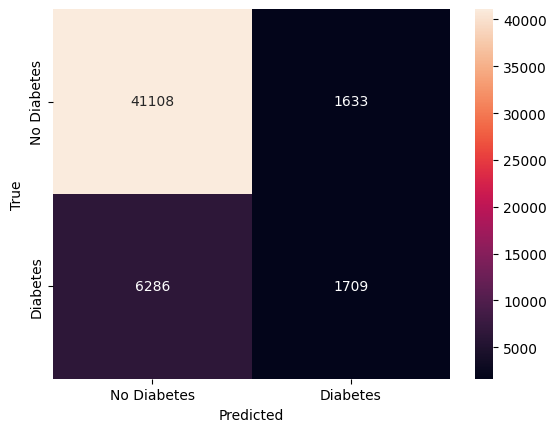

In [43]:
y_pred_rf_tuned = rf_tuned.predict(X_test)

print(classification_report(y_test, y_pred_rf_tuned))
cm = confusion_matrix(y_test, y_pred_rf_tuned)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Hyperparameter Tuning - RandomizedSearchCV

In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 200],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=2,              
    cv=2,                 
    verbose=2,
    random_state=42,
    n_jobs=-1            
)

random_search.fit(X_train, y_train)


Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 200]},
                   random_state=42, verbose=2)

In [50]:
print('Best parameters:', random_search.best_params_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [73]:
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [74]:
best_rf.score(X_test, y_test)

0.8508948281299274

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42741
           1       0.58      0.19      0.28      7995

    accuracy                           0.85     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736



Text(50.72222222222221, 0.5, 'True')

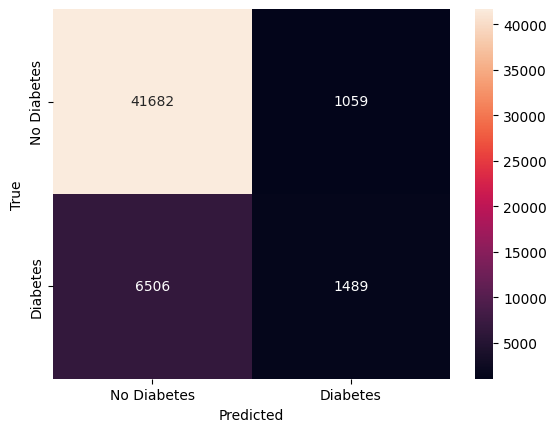

In [75]:
y_pred_best = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d',
           xticklabels=['No Diabetes','Diabetes'],
           yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')

### Feature Importance

<Axes: >

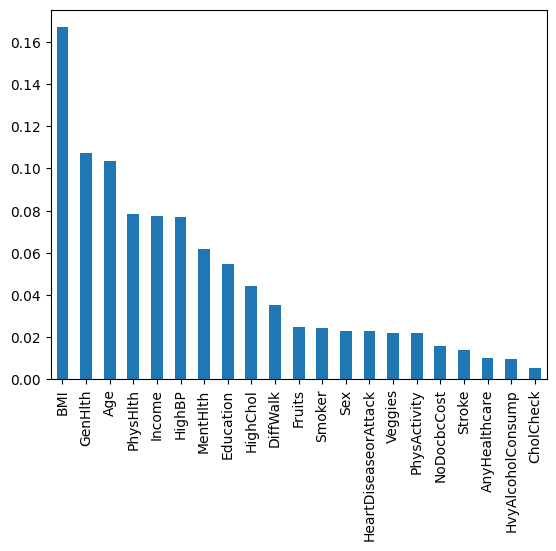

In [62]:
importances = best_rf.feature_importances_
feature_names = X.columns 
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False).plot.bar()

In [76]:

forest = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42, oob_score=True)

In [78]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       oob_score=True, random_state=42)

### OOB Error 

In [82]:
oob_score = forest.oob_score_
oob_score

0.8492638363292336

In [90]:
import numpy as np

oob_preds = np.argmax(forest.oob_decision_function_, axis=1)

print(classification_report(y_train, oob_preds))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92    170962
           1       0.57      0.18      0.28     31982

    accuracy                           0.85    202944
   macro avg       0.72      0.58      0.60    202944
weighted avg       0.82      0.85      0.82    202944



### Handle Imbalance

In [100]:
y.value_counts(normalize=True)

Diabetes_012
0    0.842412
1    0.157588
Name: proportion, dtype: float64

In [101]:
class_weight='balanced'

# use this parameter in Randomforest

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42
             )
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
forest.fit(X_res, y_res)